In [57]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors

import pandas as pd
import seaborn as sns

In [58]:
mtor = pd.read_csv("../../data/chembl_mtor_ic50.csv", delimiter=";")
mtor.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID
0,CHEMBL1773577,NaN,0,443.49,0.0,3.65,40,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
1,CHEMBL1773561,NaN,0,390.47,0.0,4.60,24,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
2,CHEMBL1773077,NaN,0,406.47,0.0,4.30,25,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
3,CHEMBL1773580,NaN,0,443.49,0.0,3.65,43,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,IC50,'=',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN
4,CHEMBL1773578,NaN,0,457.51,0.0,3.68,41,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,IC50,'>',...,CHEMBL2842,Serine/threonine-protein kinase mTOR,Homo sapiens,SINGLE PROTEIN,CHEMBL1773016,1,Scientific Literature,J. Med. Chem.,2011,NaN


In [59]:
mols =  Chem.SDMolSupplier('../../data/drugbank.sdf')
drugbank = [mol for mol in mols if mol]

[13:21:20] Explicit valence for atom # 7 N, 4, is greater than permitted
[13:21:20] ERROR: Could not sanitize molecule ending on line 20009
[13:21:20] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[13:21:21] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:21:21] ERROR: Could not sanitize molecule ending on line 250947
[13:21:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:21:21] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:21:21] ERROR: Could not sanitize molecule ending on line 258130
[13:21:21] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[13:21:21] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:21:21] ERROR: Could not sanitize molecule ending on line 261581
[13:21:21] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[13:21:21] Explicit valence for atom # 47 Mg, 4, is greater than permitted
[13:21:21] ERROR: Could not sanitize

In [60]:
mtor = mtor[["Molecule ChEMBL ID", "Smiles"]]
mtor["mol"] = mtor.apply(lambda row: Chem.MolFromSmiles(row["Smiles"]), axis=1)
mtor["Source"] = "mtor"
mtor.rename({"Molecule ChEMBL ID":"ID"}, axis=1, inplace=True)
mtor.head()

,ID,Smiles,mol,Source
0,CHEMBL1773577,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b3040>,mtor
1,CHEMBL1773561,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b30a0>,mtor
2,CHEMBL1773077,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b25c0>,mtor
3,CHEMBL1773580,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b3160>,mtor
4,CHEMBL1773578,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b3280>,mtor


In [61]:
pd_drugbank = pd.DataFrame(drugbank, columns=["mol"])
pd_drugbank["Smiles"] = pd_drugbank.apply(lambda row: Chem.MolToSmiles(row["mol"]), axis=1)
pd_drugbank["Source"] = "drugbank"
pd_drugbank["ID"] = pd_drugbank.apply(lambda row: row["mol"].GetProp("DATABASE_ID"), axis=1)
pd_drugbank.head()

,mol,Smiles,Source,ID
0,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b12a0>,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,drugbank,DB00006
1,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b1c60>,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,drugbank,DB00014
2,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b13c0>,N=C(N)NCCC[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@@H]1...,drugbank,DB00035
3,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b1240>,CC(=O)N[C@H](Cc1ccc2ccccc2c1)C(=O)N[C@H](Cc1cc...,drugbank,DB00050
4,<rdkit.Chem.rdchem.Mol object at 0x7f4dcf8b0ac0>,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,drugbank,DB00091


In [62]:
m = pd_drugbank["mol"][0]
m.GetNumAtoms(), Descriptors.MolLogP(m), Descriptors.NumHAcceptors(m), Descriptors.NumHDonors(m)

(155, -8.116429999999927, 29, 28)

In [63]:
drugbank_data = pd.DataFrame(list(
    pd_drugbank.apply(
        lambda row: (row["mol"].GetNumAtoms(),
                     Descriptors.MolLogP(row["mol"]),
                     Descriptors.NumHAcceptors(row["mol"]),
                     Descriptors.NumHDonors(row["mol"])), axis=1)),
    columns=["NA", "LogP", "NHA", "NHD"])
pd_drugbank = pd_drugbank.join(drugbank_data)

In [64]:
mtor_data = pd.DataFrame(list(
    mtor.apply(
        lambda row: (row["mol"].GetNumAtoms(),
                     Descriptors.MolLogP(row["mol"]),
                     Descriptors.NumHAcceptors(row["mol"]),
                     Descriptors.NumHDonors(row["mol"])), axis=1)),
    columns=["NA", "LogP", "NHA", "NHD"])
mtor = mtor.join(mtor_data)

<AxesSubplot:>

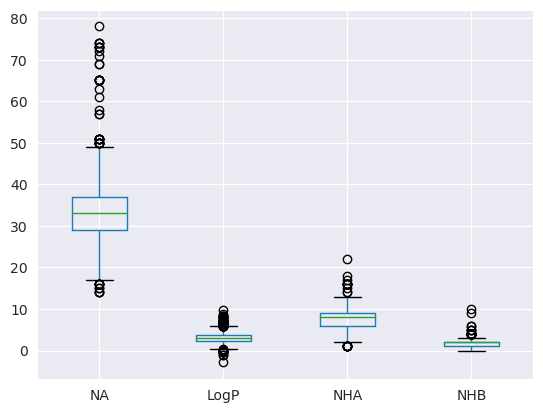

In [67]:
mtor.boxplot()

<AxesSubplot:>

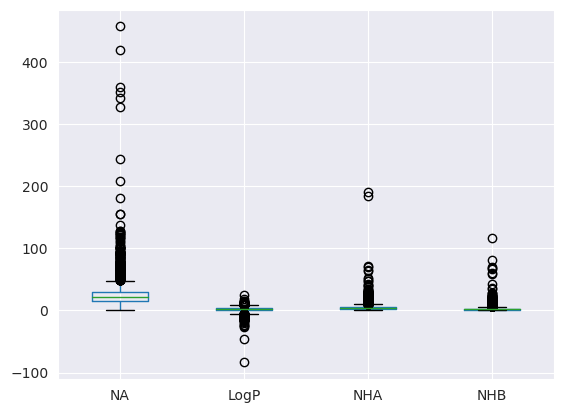

In [69]:
pd_drugbank.boxplot()

In [66]:
df = pd.concat([mtor, pd_drugbank])

array([[<AxesSubplot:title={'center':'LogP'}, xlabel='[Source]'>,
        <AxesSubplot:title={'center':'NA'}, xlabel='[Source]'>],
       [<AxesSubplot:title={'center':'NHA'}, xlabel='[Source]'>,
        <AxesSubplot:title={'center':'NHB'}, xlabel='[Source]'>]],
      dtype=object)

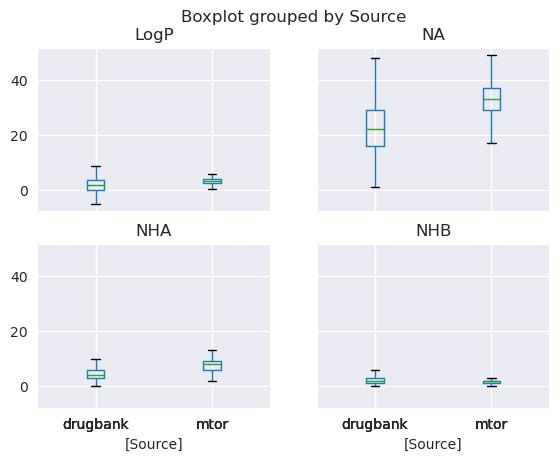

In [72]:
df.boxplot(by="Source", showfliers=False)